In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
single_train = pd.read_csv("../final_dataset/single/single_train.csv")
single_valid = pd.read_csv("../final_dataset/single/single_valid.csv")
single_test = pd.read_csv("../final_dataset/single/single_test.csv")

In [3]:
feature_columns = single_train.columns[1:-1]

X_single_train = single_train[feature_columns].values
Y_single_train = single_train['Label'].values

X_single_valid = single_valid[feature_columns].values
Y_single_valid = single_valid['Label'].values

X_single_test = single_test[feature_columns].values
Y_single_test = single_test['Label'].values

In [4]:
single_scaler = StandardScaler()

X_single_train = single_scaler.fit_transform(X_single_train)
X_single_valid = single_scaler.transform(X_single_valid)
X_single_test = single_scaler.transform(X_single_test)


Y_single_train = Y_single_train.astype(int)
Y_single_valid = Y_single_valid.astype(int)
Y_single_test = Y_single_test.astype(int)


In [64]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score, confusion_matrix


def print_classification_result(result_df, model_name, data_type, y_true, y_pred, y_pred_prob):
    # 정확도
    accuracy = accuracy_score(y_true, y_pred)
    
    # 정밀도 (단일 스칼라 값)
    precision = precision_score(y_true, y_pred, average='weighted')  
    
    # 재현율 (단일 스칼라 값)
    recall = recall_score(y_true, y_pred, average='weighted')  
    
    # F1 점수 (단일 스칼라 값)
    f1 = f1_score(y_true, y_pred, average='weighted')  
    
    # AUC Score 계산
    auc_score = roc_auc_score(y_true, y_pred_prob[:, 1])
    
    # PR Score 계산
    pr_score = average_precision_score(y_true, y_pred_prob[:, 1])
    
    # 결과 저장 (각 지표의 단일 값 저장)
    result_df.loc[len(result_df)] = [
        model_name,
        data_type,
        accuracy,
        precision,
        recall,
        f1,
        auc_score,
        pr_score
    ]


In [6]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb

In [7]:
# 최적 하이퍼파라미터로 모델 선언

# Single Train Data
random_forest_single_best = RandomForestClassifier(
    n_estimators=100, 
    min_samples_split=2, 
    min_samples_leaf=2, 
    max_features='sqrt', 
    max_depth=20, 
    random_state=42
)

extra_trees_single_best = ExtraTreesClassifier(
    n_estimators=500, 
    min_samples_split=2, 
    min_samples_leaf=4, 
    max_features='log2', 
    random_state=42
)

catboost_single_best = CatBoostClassifier(
    iterations=1000, 
    depth=10, 
    learning_rate=0.01, 
    l2_leaf_reg=7, 
    random_state=42, 
    verbose=0,
)

lightgbm_single_best = lgb.LGBMClassifier(
    n_estimators=200, 
    max_depth=10, 
    learning_rate=0.10, 
    num_leaves=63, 
    min_child_samples=40, 
    random_state=42
)

xgboost_single_best = xgb.XGBClassifier(
    n_estimators=200, 
    max_depth=3, 
    learning_rate=0.05, 
    subsample=0.8, 
    colsample_bytree=0.8, 
    gamma=0, 
    random_state=42
)


In [8]:
model_list = [('Random Forest', random_forest_single_best),
              ('Extra Trees', extra_trees_single_best),
              ('Cat Boost', catboost_single_best),
              ('Light GBM', lightgbm_single_best),
              ('XG Boost', xgboost_single_best)
              ]


single_result = pd.DataFrame(columns=["Model", "Data Type", "Accuracy", "Precision", "Recall", "F1 Score", "AUC score", "PR score"])

for model_name, model in model_list:
    
    # Fit the model on the entire training data
    model.fit(X_single_train, Y_single_train)
    
    # Predict on validation and test data
    train_pred = model.predict(X_single_train)
    valid_pred = model.predict(X_single_valid)
    test_pred = model.predict(X_single_test)
    
    train_pred_prob = model.predict_proba(X_single_train)
    valid_pred_prob = model.predict_proba(X_single_valid)
    test_pred_prob = model.predict_proba(X_single_test)
    
    # Output the evaluation metrics
    print_classification_result(single_result, model_name, 'Train', Y_single_train, train_pred, train_pred_prob)
    print_classification_result(single_result, model_name, 'Validation', Y_single_valid, valid_pred, valid_pred_prob)
    print_classification_result(single_result, model_name, 'Test', Y_single_test, test_pred, test_pred_prob)

[LightGBM] [Info] Number of positive: 1269, number of negative: 1641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1669
[LightGBM] [Info] Number of data points in the train set: 2910, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.436082 -> initscore=-0.257077
[LightGBM] [Info] Start training from score -0.257077
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [9]:
print(single_result)

            Model   Data Type  Accuracy  Precision    Recall  F1 Score  \
0   Random Forest       Train  0.993127   0.993145  0.993127  0.993124   
1   Random Forest  Validation  0.928965   0.929728  0.928965  0.929142   
2   Random Forest        Test  0.784243   0.784375  0.784243  0.783473   
3     Extra Trees       Train  0.983505   0.983624  0.983505  0.983485   
4     Extra Trees  Validation  0.902633   0.902818  0.902633  0.902709   
5     Extra Trees        Test  0.774459   0.774750  0.774459  0.773464   
6       Cat Boost       Train  0.990722   0.990762  0.990722  0.990715   
7       Cat Boost  Validation  0.938151   0.939707  0.938151  0.938386   
8       Cat Boost        Test  0.782183   0.781958  0.782183  0.781784   
9       Light GBM       Train  1.000000   1.000000  1.000000  1.000000   
10      Light GBM  Validation  0.944887   0.946886  0.944887  0.945127   
11      Light GBM        Test  0.790937   0.790723  0.790937  0.790728   
12       XG Boost       Train  0.95841

In [65]:
# 혼동 행렬 시각화를 위한 함수 정의
def plot_confusion_matrix(model_name, true_labels, predictions):
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

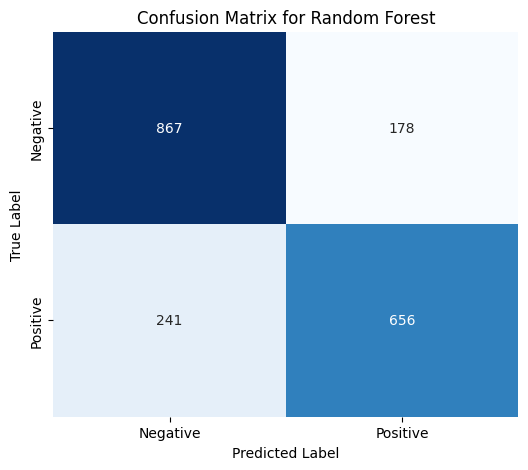

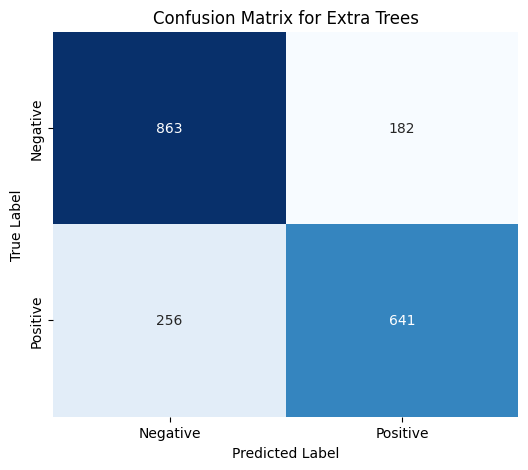

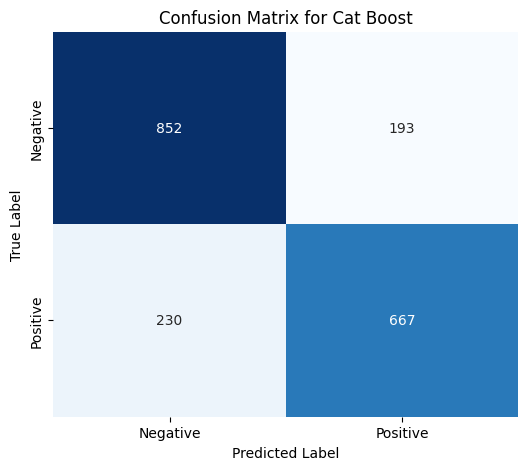

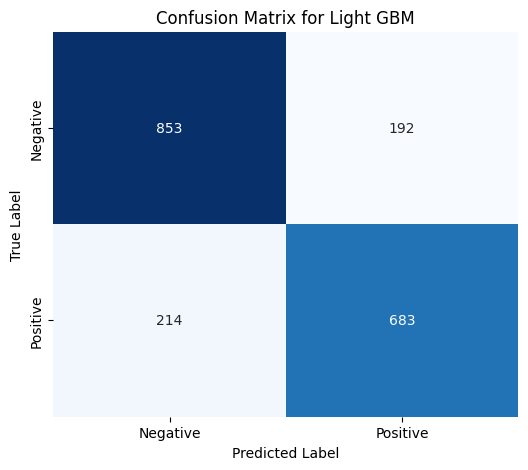

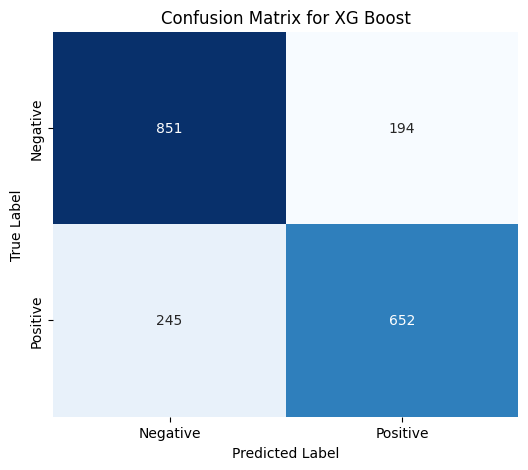

In [66]:
for model_name, model in model_list:
    
    # 테스트 데이터에 대한 예측
    test_pred = model.predict(X_single_test)
    
    # 혼동 행렬 시각화
    plot_confusion_matrix(model_name, Y_single_test, test_pred)

In [10]:
test_1 = pd.read_csv("../final_dataset/each_test/single/A_S_11.csv")
test_2 = pd.read_csv("../final_dataset/each_test/single/B_S_11.csv")
test_3 = pd.read_csv("../final_dataset/each_test/single/C_S_11.csv")
test_4 = pd.read_csv("../final_dataset/each_test/single/D_S_11.csv")
test_5 = pd.read_csv("../final_dataset/each_test/single/E_S_11.csv")
test_6 = pd.read_csv("../final_dataset/each_test/single/F_S_11.csv")
test_7 = pd.read_csv("../final_dataset/each_test/single/G_S_11.csv")
test_8 = pd.read_csv("../final_dataset/each_test/single/H_S_11.csv")
test_9 = pd.read_csv("../final_dataset/each_test/single/I_S_11.csv")
test_10 = pd.read_csv("../final_dataset/each_test/single/J_S_11.csv")

In [11]:
# feature_columns 정의
feature_columns = test_1.columns[1:-1]  # 모든 test 파일에 동일한 컬럼 구조라고 가정

# 각 test 데이터에 대해 feature와 label 추출
X_test_1 = test_1[feature_columns].values
Y_test_1 = test_1['Label'].values

X_test_2 = test_2[feature_columns].values
Y_test_2 = test_2['Label'].values

X_test_3 = test_3[feature_columns].values
Y_test_3 = test_3['Label'].values

X_test_4 = test_4[feature_columns].values
Y_test_4 = test_4['Label'].values

X_test_5 = test_5[feature_columns].values
Y_test_5 = test_5['Label'].values

X_test_6 = test_6[feature_columns].values
Y_test_6 = test_6['Label'].values

X_test_7 = test_7[feature_columns].values
Y_test_7 = test_7['Label'].values

X_test_8 = test_8[feature_columns].values
Y_test_8 = test_8['Label'].values

X_test_9 = test_9[feature_columns].values
Y_test_9 = test_9['Label'].values

X_test_10 = test_10[feature_columns].values
Y_test_10 = test_10['Label'].values

In [12]:
# Scaler 적용 및 데이터 형 변환을 처리하는 함수 정의
def process_test_data(X_test, Y_test, scaler):
    # 데이터 스케일링
    X_test_scaled = scaler.transform(X_test)
    
    # int 타입으로 변환
    Y_test = Y_test.astype(int)
    
    return X_test_scaled, Y_test


In [13]:
# X_single_train, X_single_valid, X_single_test의 스케일러로 test 데이터 변환
X_test_1, Y_test_1 = process_test_data(X_test_1, Y_test_1, single_scaler)
X_test_2, Y_test_2 = process_test_data(X_test_2, Y_test_2, single_scaler)
X_test_3, Y_test_3 = process_test_data(X_test_3, Y_test_3, single_scaler)
X_test_4, Y_test_4 = process_test_data(X_test_4, Y_test_4, single_scaler)
X_test_5, Y_test_5 = process_test_data(X_test_5, Y_test_5, single_scaler)
X_test_6, Y_test_6 = process_test_data(X_test_6, Y_test_6, single_scaler)
X_test_7, Y_test_7 = process_test_data(X_test_7, Y_test_7, single_scaler)
X_test_8, Y_test_8 = process_test_data(X_test_8, Y_test_8, single_scaler)
X_test_9, Y_test_9 = process_test_data(X_test_9, Y_test_9, single_scaler)
X_test_10, Y_test_10 = process_test_data(X_test_10, Y_test_10, single_scaler)

In [14]:
import os

# 모델을 사용하여 예측 및 점프수 계산을 반복적으로 수행하는 함수
def process_and_visualize(test_data, Y_test, model, model_name, test_name, output_dir):
    
    # 테스트 데이터에 대한 예측
    predictions = model.predict(test_data)
    
    # 이동 평균을 계산하여 예측값 부드럽게 만들기
    smoothed_predictions = np.convolve(predictions.squeeze(), np.ones(5)/5, mode='same')
    
    # 테스트 데이터에 대한 예측 결과를 바이너리 형태로 변환
    binary_predictions = (smoothed_predictions > 0.5).astype(int)
    
    # 0에서 1로 바뀌는 구간에서 줄넘기 개수 카운트
    jump_count = np.sum(np.diff(binary_predictions.flatten()) > 0)
    
    # 예측 결과 시각화
    plt.plot(Y_test, label='Actual')
    plt.plot(binary_predictions.flatten(), label='Predicted')
    plt.title(f'Actual vs Predicted for {test_name} player using {model_name}')  
    plt.xlabel('Data Point')
    plt.ylabel('Label')
    plt.legend()
    plt.savefig(os.path.join(output_dir, f'{model_name}_predictions_{test_name}.png'))
    plt.close()  # 현재 플롯 닫기



In [15]:
test_data_list = [
    (X_test_1, Y_test_1, "A"),
    (X_test_2, Y_test_2, "B"),
    (X_test_3, Y_test_3, "C"),
    (X_test_4, Y_test_4, "D"),
    (X_test_5, Y_test_5, "E"),
    (X_test_6, Y_test_6, "F"),
    (X_test_7, Y_test_7, "G"),
    (X_test_8, Y_test_8, "H"),
    (X_test_9, Y_test_9, "I"),
    (X_test_10, Y_test_10, "J")
]

In [16]:
# 결과를 저장할 디렉토리 생성
output_dir = '../single_model_predictions'


# 모델 학습 및 테스트 데이터에 대한 점프 수 계산 및 시각화
for model_name, model in model_list:
    
    # 각 테스트 데이터에 대해 process_and_visualize 호출
    for test_data, Y_test, test_name in test_data_list:
        # 예측 결과 시각화 및 이미지로 저장
        process_and_visualize(test_data, Y_test, model, model_name, test_name, output_dir)
        
        

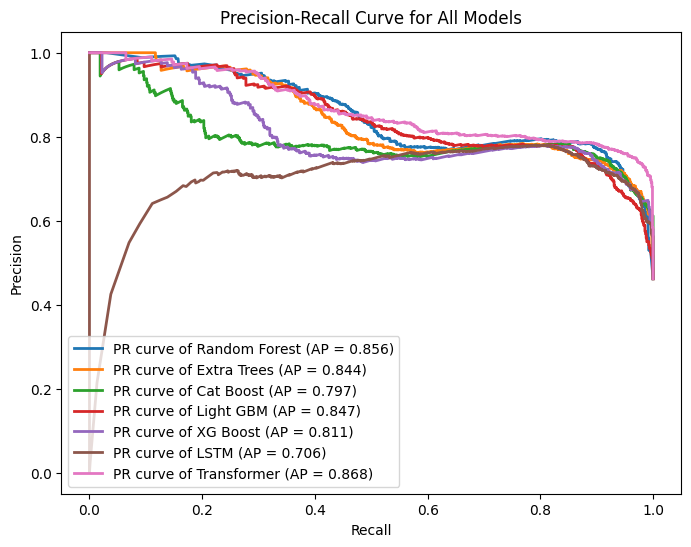

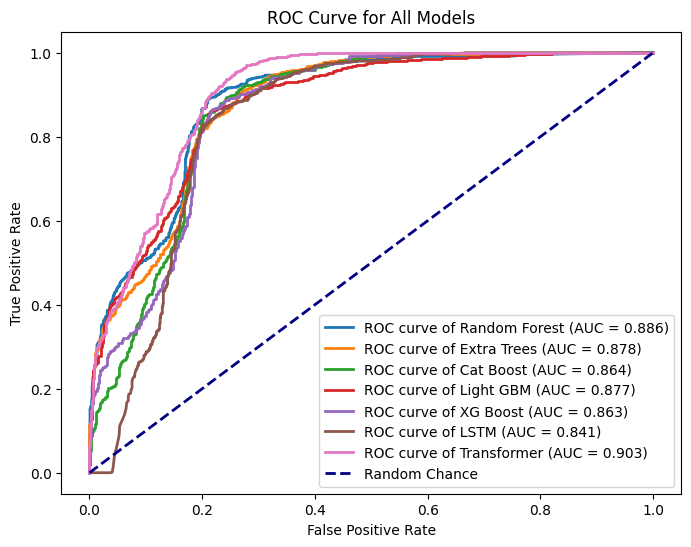

In [17]:
# PR curve 및 ROC curve를 위한 리스트
single_Y_prob_list = []
model_names = []

# 각 모델에 대해 fit하고 평가 결과 저장
for model_name, model in model_list:
    
    
    # 테스트 데이터에 대해 예측 확률 값 저장
    test_pred_prob = model.predict_proba(X_single_test)[:, 1]  # 양성 클래스에 대한 확률
    
    # 저장된 확률 값을 리스트에 추가
    single_Y_prob_list.append(test_pred_prob)
    model_names.append(model_name)

# LSTM과 Transformer 예측값 불러오기
lstm_pred_prob = np.load('pred_prob/lstm_pred_prob_single.npy') 
transformer_pred_prob = np.load('pred_prob/transformer_pred_prob_single.npy')

# 트리 기반 모델들과 마찬가지로 리스트에 추가
single_Y_prob_list.append(lstm_pred_prob)
model_names.append('LSTM')

single_Y_prob_list.append(transformer_pred_prob)
model_names.append('Transformer')

# Precision-Recall 곡선 및 PR Score 그리기
plt.figure(figsize=(8, 6))
for model_name, single_Y_prob in zip(model_names, single_Y_prob_list):
    s_precision, s_recall, _ = precision_recall_curve(Y_single_test, single_Y_prob)
    pr_score = average_precision_score(Y_single_test, single_Y_prob)  # PR score 계산
    
    # PR 곡선 그리기, PR score 추가
    plt.plot(s_recall, s_precision, lw=2, label=f'PR curve of {model_name} (AP = {pr_score:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for All Models')
plt.legend(loc='lower left')
plt.show()

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
for model_name, single_Y_prob in zip(model_names, single_Y_prob_list):
    s_fpr, s_tpr, _ = roc_curve(Y_single_test, single_Y_prob)
    single_roc_auc = auc(s_fpr, s_tpr)
    plt.plot(s_fpr, s_tpr, lw=2, label=f'ROC curve of {model_name} (AUC = {single_roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc='lower right')
plt.show()

In [57]:
# Random Forest 모델의 변수 중요도 구하기
single_feature_imp_df = pd.DataFrame(lightgbm_single_best.feature_importances_, index = feature_columns)
single_feature_imp_df.reset_index(inplace = True)
single_feature_imp_df.columns = ["Features", "Feature Importance"]

In [58]:
# 변수 중요도가 높은 순서대로 공공도서관 요인 정렬하기
single_feature_imp_df = single_feature_imp_df.sort_values("Feature Importance", ascending = False)


In [59]:
# 변수 중요도의 누적합을 담은 열 추가하기
single_feature_imp_df["Feature Importance"] = single_feature_imp_df["Feature Importance"]/single_feature_imp_df["Feature Importance"].sum()
cum_single_feature_imp = single_feature_imp_df["Feature Importance"].cumsum()
single_feature_imp_df.insert(2, "Cumsum of Feature Importance", cum_single_feature_imp)

In [60]:
# 변수 중요도의 누적합 계산
single_feature_imp_df["Cumsum of Feature Importance"] = single_feature_imp_df["Feature Importance"].cumsum()


In [61]:
# 데이터프레임의 인덱스 초기화하기
single_feature_imp_df.reset_index(inplace = True)
single_feature_imp_df.drop(columns = "index", inplace= True)

In [62]:
single_feature_imp_df

,Features,Feature Importance,Cumsum of Feature Importance
0,LAnkle_Y,0.068870,0.068870
1,RWrist_Y,0.065131,0.134001
2,RAnkle_Y,0.051260,0.185261
3,LWrist_Y,0.050416,0.235677
4,LWrist_X,0.048124,0.283802
5,LHip_X,0.045592,0.329393
6,LShoulder_X,0.044989,0.374382
7,RWrist_X,0.044144,0.418526
8,Neck,0.044024,0.462550
9,Chest,0.043903,0.506453


/tmp/ipykernel_1002837/3009671703.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_15_features["Features"], x=top_15_features["Feature Importance"], palette="YlGnBu")


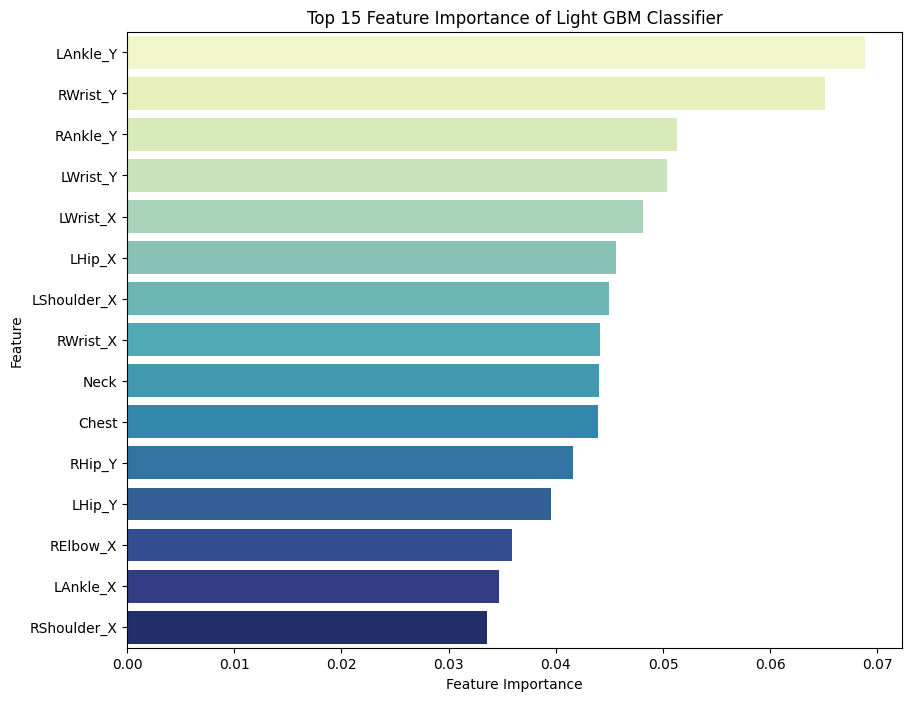

In [69]:
# 각 변수의 상대적 중요도 시각화하기 (Feature Importance Plot)
import seaborn as sns
import matplotlib.pyplot as plt

# 상위 15개 특성만 선택하기
top_15_features = single_feature_imp_df.nlargest(15, 'Feature Importance')

# 시각화하기
fig = plt.figure(figsize=(10, 8))
sns.barplot(y=top_15_features["Features"], x=top_15_features["Feature Importance"], palette="YlGnBu")
plt.title("Top 15 Feature Importance of Light GBM Classifier")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

In [25]:
X_single_test_df = pd.DataFrame(X_single_test, columns=feature_columns)

In [26]:
sample_index = 1

/root/anaconda3/envs/jw_tensorflow/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


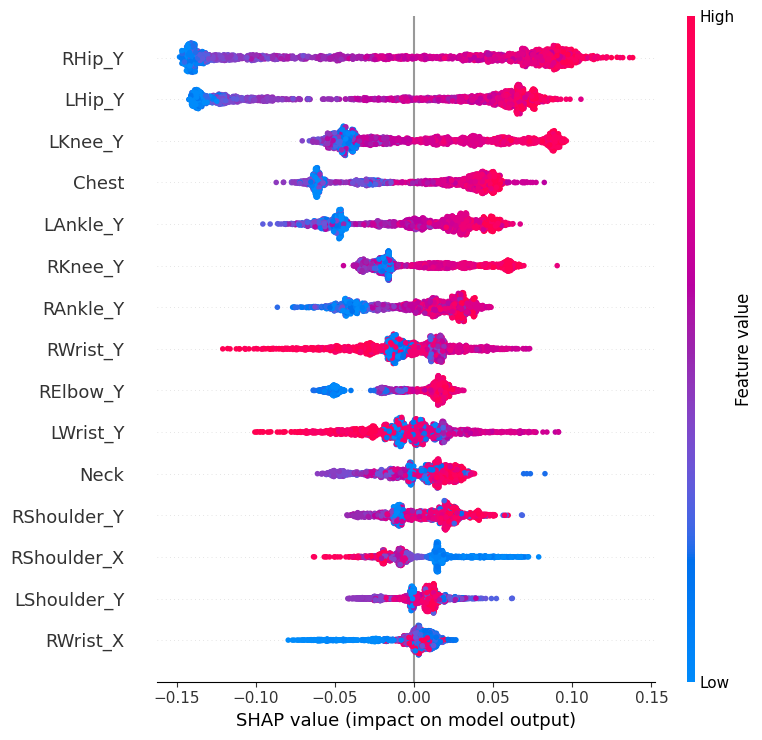

In [27]:
import shap
import matplotlib.pyplot as plt

random_forest_single_explainer = shap.TreeExplainer(random_forest_single_best)
random_forest_single_shap_values = random_forest_single_explainer.shap_values(X_single_test_df)
shap.summary_plot(random_forest_single_shap_values[:,:,0], X_single_test_df, max_display=15)
plt.show()

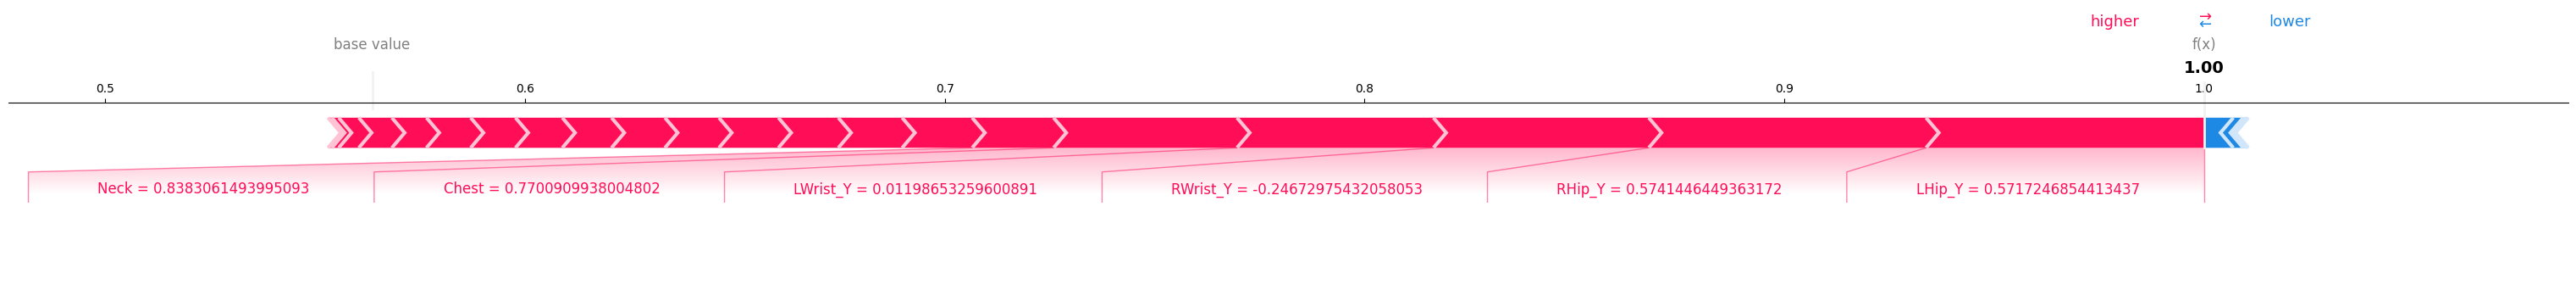

In [49]:
shap.force_plot(random_forest_single_explainer.expected_value[0], 
                random_forest_single_shap_values[sample_index, : ,0], 
                X_single_test_df.iloc[sample_index, :],
                matplotlib=True, 
                figsize=(39, 3))
plt.show()

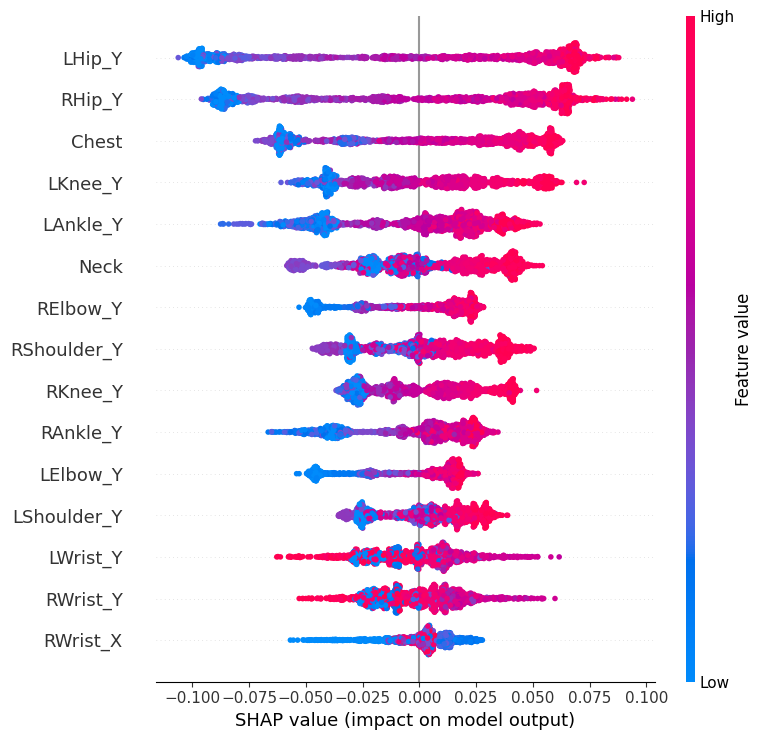

In [29]:
extra_trees_single_explainer = shap.TreeExplainer(extra_trees_single_best)
extra_trees_single_shap_values = extra_trees_single_explainer.shap_values(X_single_test_df)
shap.summary_plot(extra_trees_single_shap_values[:,:,0], X_single_test_df, max_display=15)
plt.show()

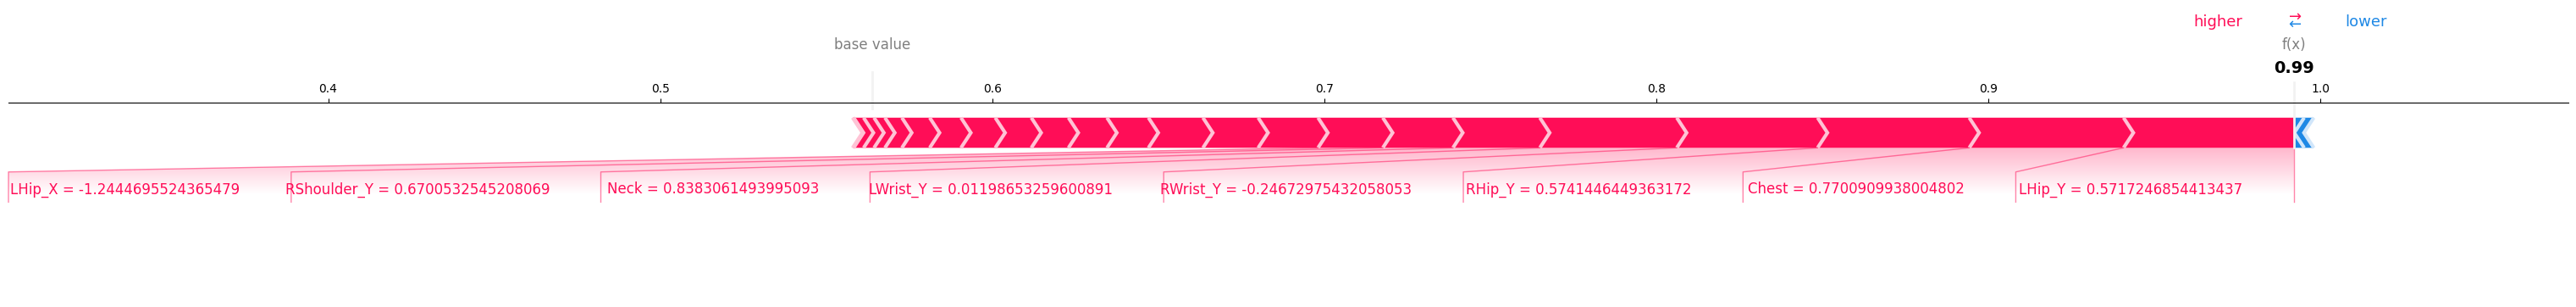

In [48]:
shap.force_plot(extra_trees_single_explainer.expected_value[0], 
                extra_trees_single_shap_values[sample_index, : ,0], 
                X_single_test_df.iloc[sample_index, :],
                matplotlib=True, 
                figsize=(39, 3))
plt.show()

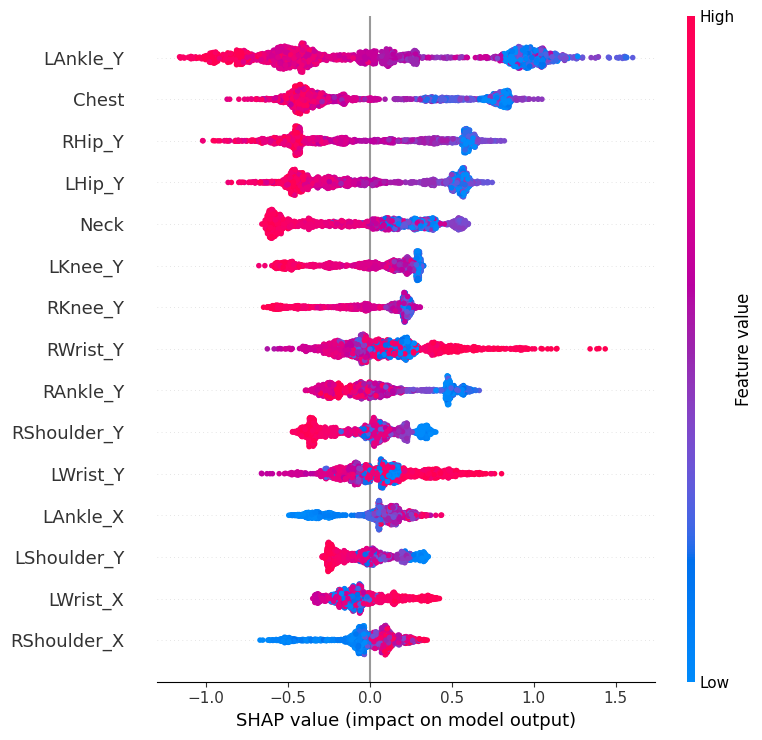

In [31]:
catboost_single_explainer = shap.TreeExplainer(catboost_single_best)
catboost_single_shap_values = catboost_single_explainer.shap_values(X_single_test_df)
shap.summary_plot(catboost_single_shap_values, X_single_test_df, max_display=15)
plt.show()

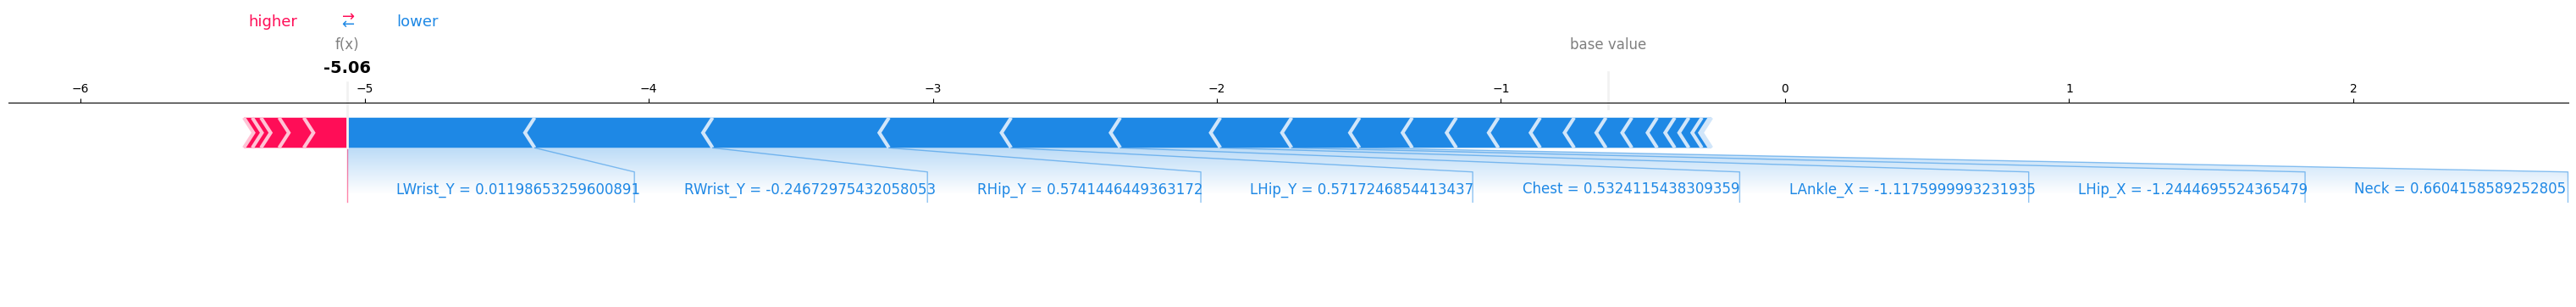

In [56]:
# print(catboost_single_shap_values.shape)

shap.force_plot(catboost_single_explainer.expected_value, 
                catboost_single_shap_values[0], 
                X_single_test_df.iloc[0],
                matplotlib=True, 
                figsize=(39, 3))
plt.show()

/root/anaconda3/envs/jw_tensorflow/lib/python3.11/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


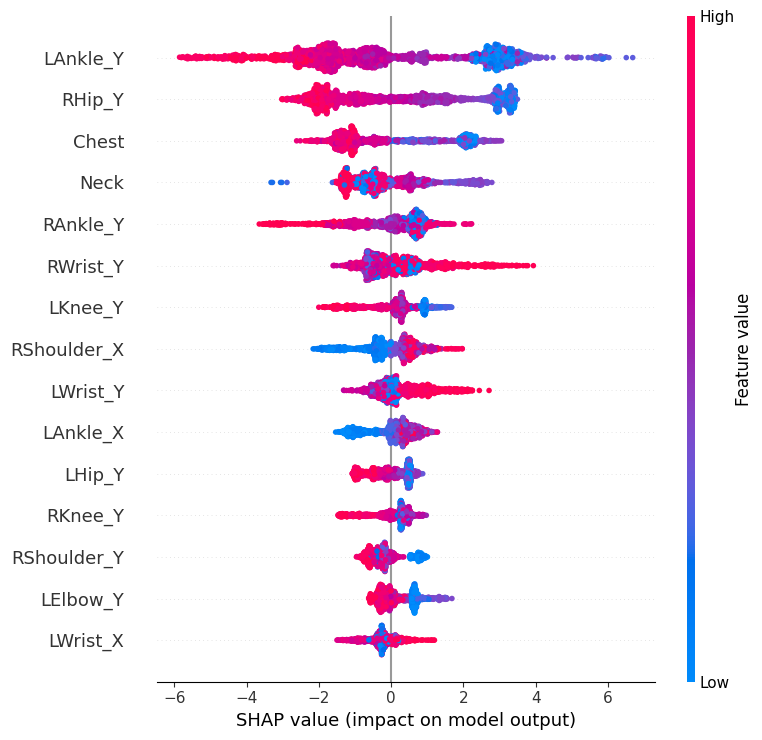

In [33]:
lightgbm_single_explainer = shap.TreeExplainer(lightgbm_single_best)
lightgbm_single_shap_values = lightgbm_single_explainer.shap_values(X_single_test_df)

shap.summary_plot(lightgbm_single_shap_values, X_single_test_df, max_display=15)
plt.show()

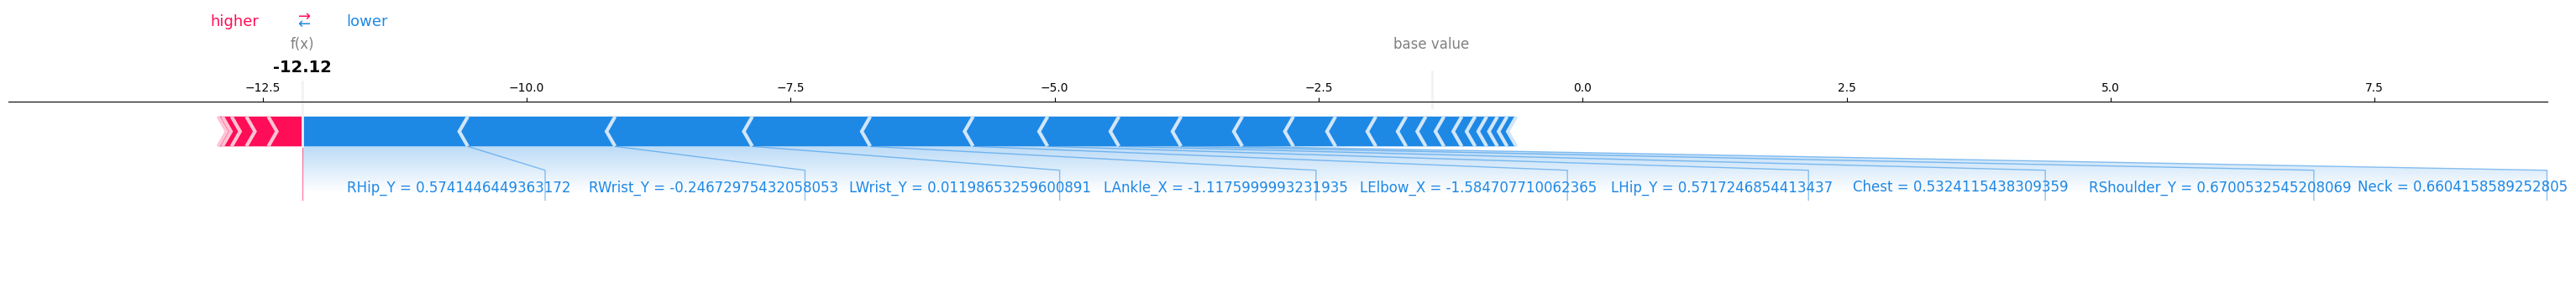

In [43]:
shap.force_plot(lightgbm_single_explainer.expected_value, 
                lightgbm_single_shap_values[0], 
                X_single_test_df.iloc[0],
                matplotlib=True, 
                figsize=(39, 3))
plt.show()

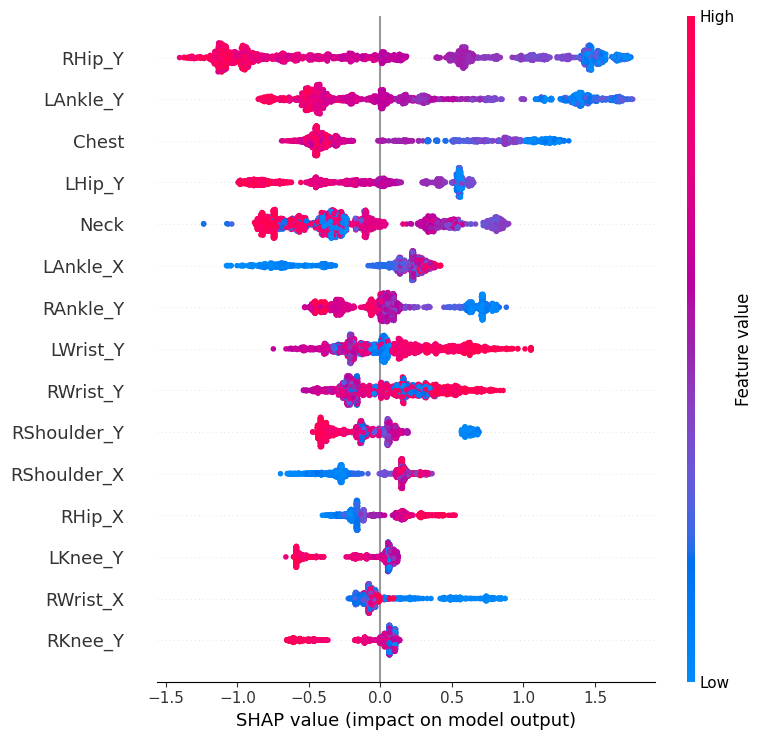

In [35]:
xgboost_single_explainer = shap.TreeExplainer(xgboost_single_best)
xgboost_single_shap_values = xgboost_single_explainer.shap_values(X_single_test_df)

shap.summary_plot(xgboost_single_shap_values, X_single_test_df, max_display=15)
plt.show()

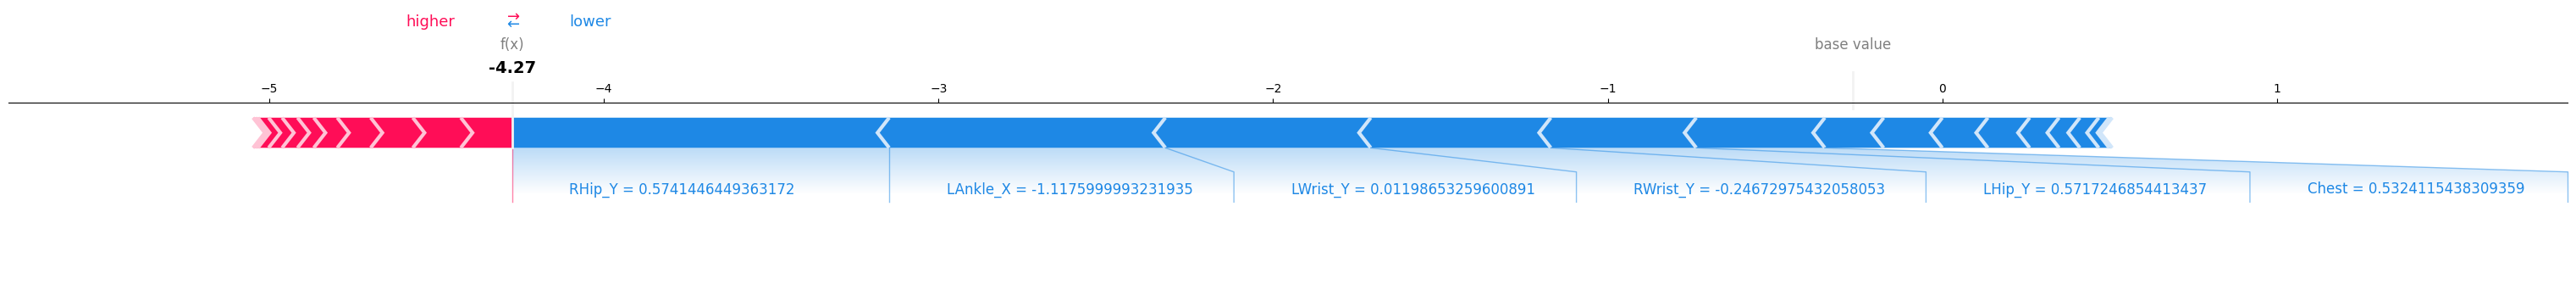

In [46]:
shap.force_plot(xgboost_single_explainer.expected_value, 
                xgboost_single_shap_values[0], 
                X_single_test_df.iloc[0],
                matplotlib=True, 
                figsize=(39, 3))
plt.show()